In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = {value:key for (key, value) in word_index.items()}

In [4]:
def decode_review(review):
    decoded = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
    return decoded

def vectorize_reviews(reviews, dimension=10000):
    results = np.zeros((len(reviews), dimension))
    for i, word_codes in enumerate(reviews):
        results[i, word_codes] = 1
    return results

x_train = vectorize_reviews(train_data)
x_test = vectorize_reviews(test_data)

y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
def build_model():
    inputs = Input(shape=(10000,))
    X = Dense(16, activation='relu')(inputs)
    X = Dense(16, activation='relu')(X)
    predictions = Dense(1, activation='sigmoid')(X)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [6]:
model = build_model()
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val), verbose=0)

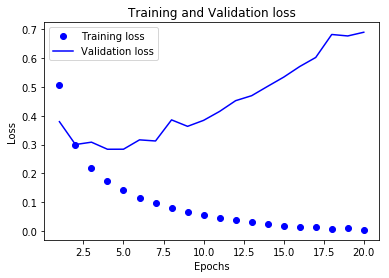

In [7]:
def plot_loss(history): 
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss(history)

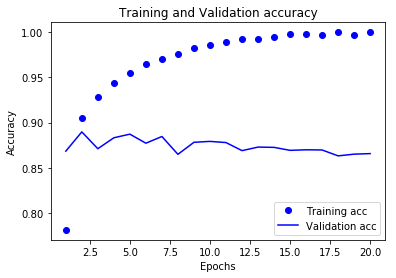

In [8]:
def plot_acc(history):
    history_dict = history.history
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_acc(history)

In [9]:
model = build_model()
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
results = model.evaluate(x_test, y_test, verbose=0)
results

[0.32315460690498354, 0.87348]